In [224]:
# Import Packages
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
import torch.nn as nn
from torch.autograd.functional import jacobian
import numpy as np

(1797, 64)
0


<Figure size 432x288 with 0 Axes>

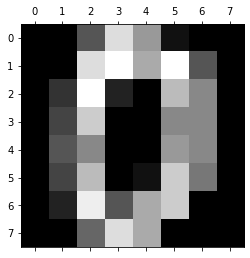

In [225]:
# Load Handwritten digits from 1797 random samples. digits['data'] is a 1797 x 64 matrix with digits.
digits = load_digits()
print(digits['data'].shape)
sample_digit = np.random.randint(0,1797)
sample_digit = 0
print(sample_digit)
plt.gray()
plt.matshow(digits.images[sample_digit])
plt.show()

In [226]:
input_dim=64     # how many Variables are in the dataset
hidden_dim = 2 # hidden layers
output_dim=1    # number of classes

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
        )
        self.initialize_weights()

    def forward(self, x):
        logits = self.linear_relu_stack(torch.FloatTensor(x))
        return logits

    def initialize_weights(self):
      for m in self.modules():
        if isinstance(m, nn.Linear):
          nn.init.normal_(m.weight,mean=0.0, std=0.19)
          if m.bias is not None:
            nn.init.normal_(m.bias,mean=0.0, std=0)

import math

def complexe_modulo(z):
  a = z.real
  b = z.imag
  return math.sqrt(a**2+b**2)

counter = 0

for i in range(1000):
  model = NeuralNetwork()

  # Pick an image from the dataset
  X = torch.FloatTensor(digits['data'][sample_digit])
  #print(X)

  # Pass it through the network
  RNN_output = model(X)
  #print(RNN_output)

  jac_matrix = jacobian(model,X)

  eigenvalues = np.linalg.eig(jac_matrix)
  #print(eigenvalues[0][0])

  max_eigenvector = float('-inf')

  for i in range(len(eigenvalues[0])):
    if complexe_modulo(eigenvalues[0][i]) > max_eigenvector:
      max_eigenvector = complexe_modulo(eigenvalues[0][i])

  if max_eigenvector > 1:
    counter +=1

print(counter)

1000


In [227]:
xs_glo = [0, 0.1,  0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.2]
ys_glo = np.array([0, 0,    4,     39,   301,   742,  972, 999, 1000])/1000

xs_1 = [0, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15 , 0.16, 0.19,0.2]
ys_1 = np.array([0,  0,   0,   2,  36, 313,  747,   972,  1000,1000])/1000

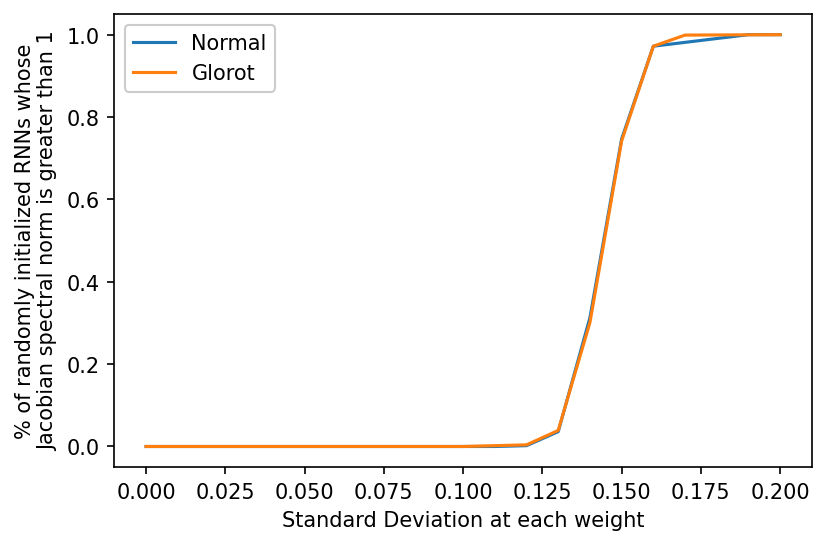

In [248]:
fig, ax = plt.subplots(dpi = 150)
ax.plot(xs_1,ys_1, label='Normal')
ax.plot(xs_glo,ys_glo, label='Glorot')
ax.legend(loc='upper left', frameon=False)
plt.xlabel("Standard Deviation at each weight")
plt.ylabel("% of randomly initialized RNNs whose"
"\n""Jacobian spectral norm is greater than 1")
plt.legend(framealpha=1, frameon=True);
plt.show()

In [242]:
RNN_output = model(X)
huge_list = RNN_output.detach().cpu().numpy().reshape(-1,1)

for i in range(10):
  RNN_output = model(RNN_output)
  huge_list = np.concatenate((huge_list,RNN_output.detach().cpu().numpy().reshape(-1,1)),axis=1)

In [243]:
huge_list.shape

(64, 11)

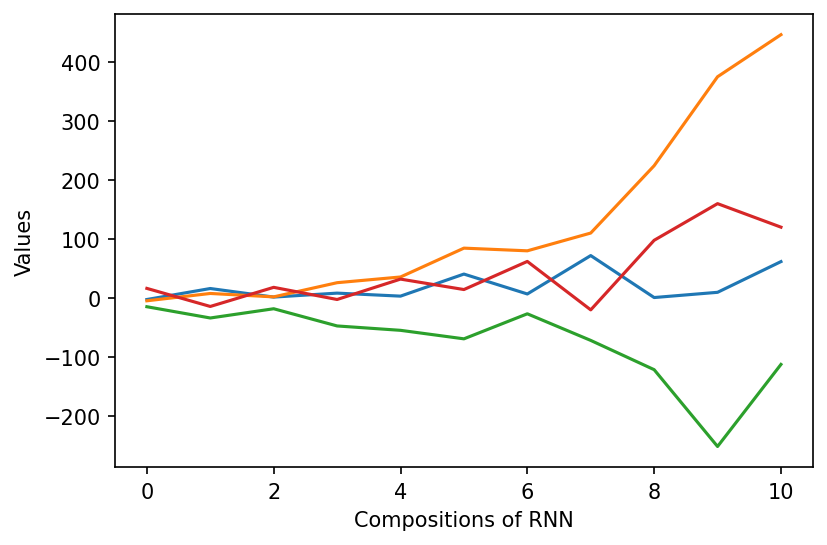

In [253]:
fig, ax = plt.subplots(dpi=150)
i=0
for series in huge_list:
  i+=1
  if i %16==0:
    plt.plot(series)
plt.xlabel("Compositions of RNN")
plt.ylabel("Values")
plt.show()